In [6]:
import pandas as pd
import seaborn as sn
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px

from dash import dcc
from dash import html
from jupyter_dash import JupyterDash

In [7]:
template='plotly_dark'

In [8]:
data_6 = pd.read_csv('../Data/Data 3/apro_mk_colm__custom_89820_page_linear.csv')
data_6.columns

Index(['DATAFLOW', 'LAST UPDATE', 'freq', 'dairyprod', 'unit', 'geo',
       'TIME_PERIOD', 'OBS_VALUE', 'OBS_FLAG'],
      dtype='object')

In [9]:
data_test_2 = pd.read_csv('../Data/Data 2/owid-covid-data.csv')
data_test_2.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [10]:
#data_7 = pd.read_csv('../Data/Donnees_Europe/Europe_expenditure_travels.csv.gz')
#data_7.columns
#data_7.head()

In [11]:
#data_7[data_7.location == 'France'][['location' ,'stringency_index']].head(30)

In [12]:
#data_7.tra_cov.unique()

In [13]:
data_2 = pd.read_csv('../Data/Data 2/owid-covid-data.csv')
data_3 = pd.read_csv('../Data/Data 3/data_PIB.csv', skiprows=6, header=None)
data_4 = pd.read_csv('../Data/Data 3/CPMNACSCAB1GQFR.csv')
data_5 = pd.read_csv('../Data/Data 3/avia_paoc__custom_92836_page_linear.csv') # Air passenger transport
data_6 = pd.read_csv('../Data/Data 3/apro_mk_colm__custom_89820_page_linear.csv')
data_7 = pd.read_csv('../Data/Data 3/avia_gooc__custom_93212_page_linear.csv')
data_8 = pd.read_csv('../Data/Donnees_Europe/Europe_expenditure_travels.csv.gz')



data_2 = data_2[['location', 'date', 'total_cases', 'total_deaths', 'human_development_index', 'population', 'stringency_index', 'gdp_per_capita', 'extreme_poverty']]
data_2.columns = ['COUNTRY', 'DATE', 'TC', 'TD', 'HDI', 'POP', 'STI', 'GDPCAP', 'POVERTY']
data_2 = data_2[data_2.COUNTRY == 'France']
data_2['DATE'] = pd.to_datetime(data_2['DATE'])
data_2['Quarter'] = data_2['DATE']
data_2['Quarter'] = pd.PeriodIndex(data_2['Quarter'], freq='Q').to_timestamp()
#data_2 = data_2[data_2.Quarter.isin(pd.PeriodIndex(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2',
#       '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4'], freq='Q'))]
data_2.drop(['COUNTRY'], axis=1, inplace=True)

data_3.drop([2], axis=1, inplace=True)
data_3 = data_3[data_3[0] >= '2020Q1']
data_3.rename(
    columns={0: "Quarter", 1: "PBI_var"},
    inplace=True,
)
data_3.sort_values(by='Quarter', ascending=True, inplace=True)
data_3['Quarter'] = pd.PeriodIndex(data_3['Quarter'], freq='Q').to_timestamp()

data_4.rename(
    columns={'CPMNACSCAB1GQFR': "GDP"},
    inplace=True,
)
data_4['Quarter'] = pd.PeriodIndex(data_4['DATE'], freq='Q').to_timestamp()

data_5['Quarter'] = pd.PeriodIndex(data_5['TIME_PERIOD'], freq='Q').to_timestamp()
data_5.rename(
    columns={'OBS_VALUE': "APT"}, # Air passengers transport
    inplace=True,
)

data_6['Quarter'] = pd.PeriodIndex(data_6['TIME_PERIOD'], freq='Q').to_timestamp()
data_6.rename(
    columns={'OBS_VALUE': "MILK"}, # Cows'milk collection and products obtained
    inplace=True,
)

data_7['Quarter'] = pd.PeriodIndex(data_7['TIME_PERIOD'], freq='Q').to_timestamp()
data_7.rename(
    columns={'OBS_VALUE': "AFT"}, # Cows'milk collection and products obtained
    inplace=True,
)

data_8['Quarter'] = pd.PeriodIndex(data_8['TIME_PERIOD'], freq='Q').to_timestamp()
data_8.rename(
    columns={'OBS_VALUE': "EXPENDITURE"}, # Cows'milk collection and products obtained
    inplace=True,
)
#data_2.head(5)
#data_3.head(5)

In [14]:
print("data_2 columns : ", data_2.columns)
print('####################################################"')
print("data_3 columns : ", data_3.columns)
print('####################################################"')
print("data_4 columns : ", data_4.columns)

#data_2.head(5)
#data_3.head(5)

data_2 columns :  Index(['DATE', 'TC', 'TD', 'HDI', 'POP', 'STI', 'GDPCAP', 'POVERTY',
       'Quarter'],
      dtype='object')
####################################################"
data_3 columns :  Index(['Quarter', 'PBI_var'], dtype='object')
####################################################"
data_4 columns :  Index(['DATE', 'GDP', 'Quarter'], dtype='object')


In [15]:
data = data_2.merge(data_3, on='Quarter', how='outer')
data = data.merge(data_4, on='Quarter', how='inner')
data = data.merge(data_5, on='Quarter', how='inner')
data = data.merge(data_6, on='Quarter', how='inner')
#data = data.merge(data_7, on='Quarter', how='left')
#data = data.merge(data_8, on='Quarter', how='left')
#data = data.set_index('Quarter').join(data_4.set_index('Quarter'))
data = data.reset_index()
#data.DATE = pd.to_datetime(data.DATE, format='%Y%M%D')
data = data.fillna(0)
data.head(5)

,index,DATE_x,TC,TD,HDI,POP,STI,GDPCAP,POVERTY,Quarter,...,OBS_FLAG_x,DATAFLOW_y,LAST UPDATE_y,freq_y,dairyprod,unit_y,geo_y,TIME_PERIOD_y,MILK,OBS_FLAG_y
0,0,2020-01-03,0.0,0.0,0.901,67813000.0,0.0,38605.671,0.0,2020-01-01,...,0.0,ESTAT:APRO_MK_COLM(1.0),16/03/23 23:00:00,M,D1110D,THS_T,FR,2020-01,2183.90,p
1,1,2020-01-03,0.0,0.0,0.901,67813000.0,0.0,38605.671,0.0,2020-01-01,...,0.0,ESTAT:APRO_MK_COLM(1.0),16/03/23 23:00:00,M,D1110D,THS_T,FR,2020-02,2073.37,p
2,2,2020-01-03,0.0,0.0,0.901,67813000.0,0.0,38605.671,0.0,2020-01-01,...,0.0,ESTAT:APRO_MK_COLM(1.0),16/03/23 23:00:00,M,D1110D,THS_T,FR,2020-03,2233.49,p
3,3,2020-01-03,0.0,0.0,0.901,67813000.0,0.0,38605.671,0.0,2020-01-01,...,0.0,ESTAT:APRO_MK_COLM(1.0),16/03/23 23:00:00,M,D1110D,THS_T,FR,2020-01,2183.90,p
4,4,2020-01-03,0.0,0.0,0.901,67813000.0,0.0,38605.671,0.0,2020-01-01,...,0.0,ESTAT:APRO_MK_COLM(1.0),16/03/23 23:00:00,M,D1110D,THS_T,FR,2020-02,2073.37,p


In [16]:
data_quarterly = data.groupby('Quarter').agg({
                            'TC' : 'sum',
                            'TD' : 'sum',
                            'POP' : 'sum',
                            'HDI' : 'mean',
                            'STI' : 'mean',
                            'PBI_var' : 'mean',
                            'GDP' : 'mean',
                            'POVERTY' : 'mean',
                            'APT' : 'sum',
                            'MILK' : 'sum',
#                            'AFT' : 'mean',
#                            'EXPENDITURE' : 'mean'
}).reset_index()

data_quarterly['log_GDP'] = np.log(data_quarterly.GDP)

data_quarterly

,Quarter,TC,TD,POP,HDI,STI,PBI_var,GDP,POVERTY,APT,MILK,log_GDP
0,2020-01-01,3.162213e+06,162711.0,5.431821e+10,0.901,25.973708,-5.1,585312.8,0.0,7516146654,1733032.92,13.279902
1,2020-04-01,1.069626e+08,19646397.0,5.553885e+10,0.901,78.101099,-18.6,525197.4,0.0,345861243,1741996.62,13.171529
2,2020-07-01,2.262454e+08,25163028.0,5.614916e+10,0.901,47.948370,-3.6,598693.1,0.0,3756274440,1598133.84,13.302504
3,2020-10-01,1.465246e+09,37511685.0,5.614916e+10,0.901,65.664891,-4.2,600410.4,0.0,2124390768,1639481.40,13.305369
4,2021-01-01,2.747458e+09,65032389.0,5.492853e+10,0.901,64.394889,1.5,606014.8,0.0,1703832840,1683271.80,13.314660
5,2021-04-01,4.341968e+09,86086863.0,5.553885e+10,0.901,62.015275,18.7,615114.9,0.0,2517720114,1761772.74,13.329564
6,2021-07-01,5.172824e+09,92626506.0,5.614916e+10,0.901,42.550435,3.6,635644.7,0.0,7327702572,1579128.48,13.362395
7,2021-10-01,6.129173e+09,96385824.0,5.614916e+10,0.901,42.110543,5.1,642048.5,0.0,6609607152,1598125.56,13.372419
8,2022-01-01,1.553809e+10,106234173.0,5.492853e+10,0.901,35.968222,4.8,646767.9,0.0,5765241960,1667968.20,13.379743
9,2022-04-01,2.292249e+10,117486702.0,5.553885e+10,0.901,18.814286,4.2,654785.2,0.0,10259447835,1732660.02,13.392063


<Axes: xlabel='STI', ylabel='GDP'>

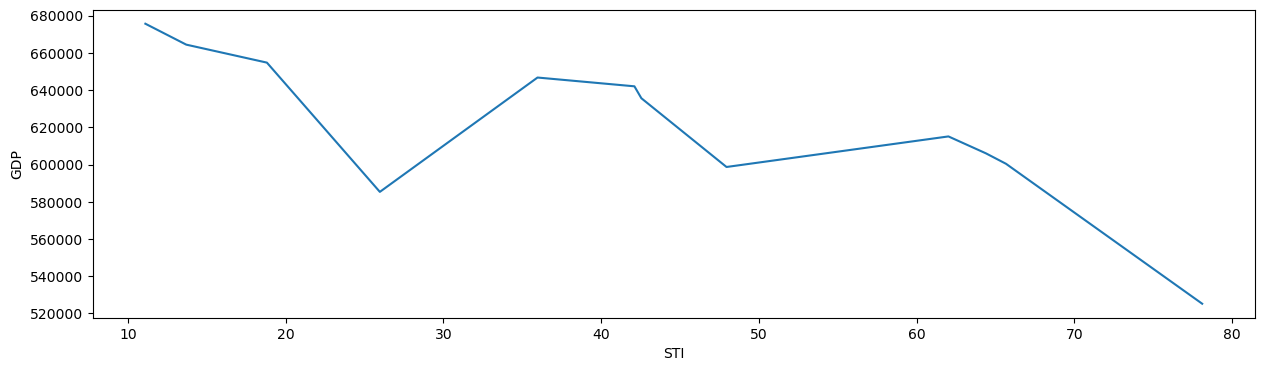

In [17]:
plt.figure(figsize=(15,4))

sn.lineplot(data=data_quarterly, x='STI', y='GDP')

In [18]:
data_quarterly_sorted = data_quarterly.sort_values(by="STI")

fig_1 = px.line(data_quarterly_sorted, x="STI", y="GDP", title='PIB en fonction de l\'intensité de confinement', template=template)
fig_1.show()

In [19]:
fig_2 = px.scatter(data_quarterly, x="STI", y="GDP", template=template)
fig_2.update_layout(
    title='PIB en fonction de l\'intensité de confinement',
    xaxis_title="Stringency Index : mesure l'intensité de confinement",
    yaxis_title="PIB"
)
fig_2.show()

In [20]:
#data_quarterly["Quarter"].to_timestamp()

fig_3 = px.line(data_quarterly, x="Quarter", y="GDP", title='PBI', template=template)
fig_3.show()

In [21]:
fig_4 = px.line(data_quarterly, x="Quarter", y="STI", title='STI', template=template)
fig_4.show()

<Axes: >

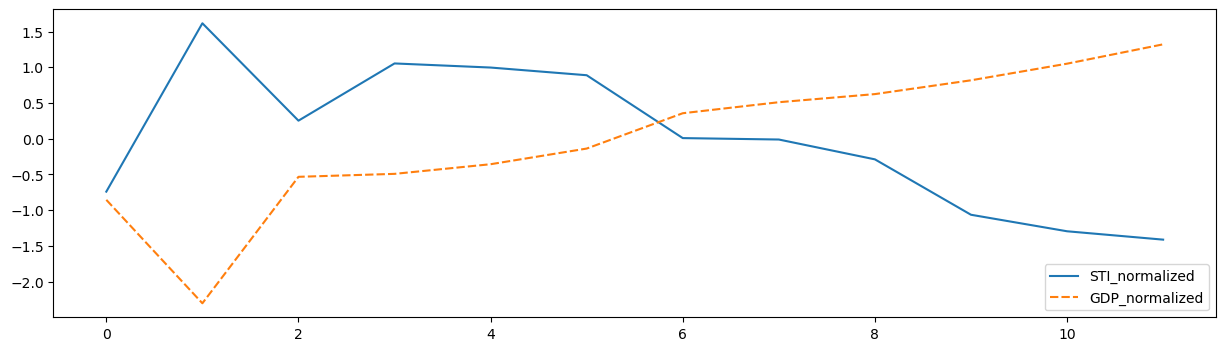

In [22]:
data_quarterly['GDP_normalized'] = (data_quarterly['GDP']-data_quarterly['GDP'].mean())/data_quarterly['GDP'].std()
data_quarterly['STI_normalized'] = (data_quarterly['STI']-data_quarterly['STI'].mean())/data_quarterly['STI'].std()

plt.figure(figsize=(15,4))

sn.lineplot(data=data_quarterly[['STI_normalized', 'GDP_normalized']])

<Axes: >

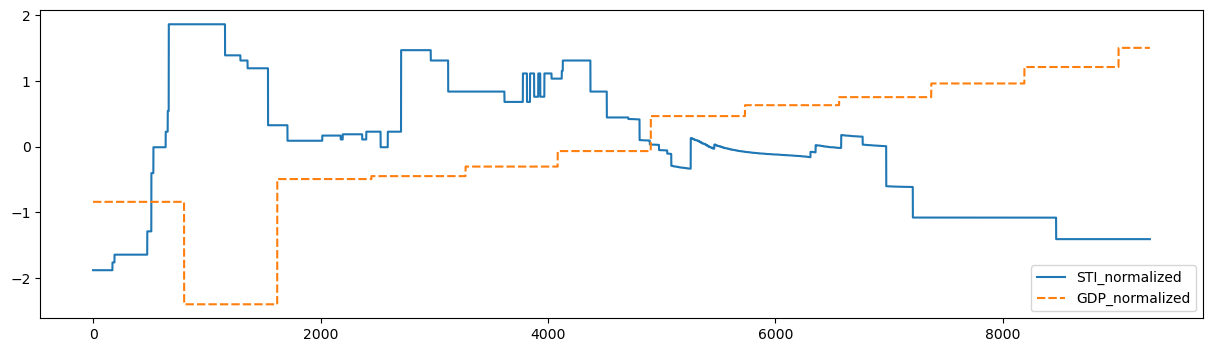

In [23]:
data['GDP_normalized'] = (data['GDP']-data['GDP'].mean())/data['GDP'].std()
data['STI_normalized'] = (data['STI']-data['STI'].mean())/data['STI'].std()

plt.figure(figsize=(15,4))

sn.lineplot(data=data[['STI_normalized', 'GDP_normalized']])

In [24]:
fig_5 = px.line(data_quarterly, x='Quarter' , y=['STI_normalized', 'GDP_normalized'], template=template)
#fig = px.line(data_quarterly, x="Quarter", y="STI", title='STI')
fig_5.update_layout(
    title='Evolution du PIB et de l\'indice d\'intensité de confinement',
    xaxis_title="Date",
    yaxis_title="PIB"
)

series_names = ["Stringency Index", "PIB"]

for idx, name in enumerate(series_names):
    fig_5.data[idx].name = name
    fig_5.data[idx].hovertemplate = name

fig_5.show()

In [25]:
data_quarterly['APT_normalized'] = (data_quarterly['APT']-data_quarterly['APT'].mean())/data_quarterly['APT'].std()
data_quarterly['STI_normalized'] = (data_quarterly['STI']-data_quarterly['STI'].mean())/data_quarterly['STI'].std()

In [26]:
data['APT_normalized'] = (data['APT']-data['APT'].mean())/data['APT'].std()
data['STI_normalized'] = (data['STI']-data['STI'].mean())/data['STI'].std()

In [27]:
data.columns

Index(['index', 'DATE_x', 'TC', 'TD', 'HDI', 'POP', 'STI', 'GDPCAP', 'POVERTY',
       'Quarter', 'PBI_var', 'DATE_y', 'GDP', 'DATAFLOW_x', 'LAST UPDATE_x',
       'freq_x', 'unit_x', 'tra_meas', 'tra_cov', 'schedule', 'geo_x',
       'TIME_PERIOD_x', 'APT', 'OBS_FLAG_x', 'DATAFLOW_y', 'LAST UPDATE_y',
       'freq_y', 'dairyprod', 'unit_y', 'geo_y', 'TIME_PERIOD_y', 'MILK',
       'OBS_FLAG_y', 'GDP_normalized', 'STI_normalized', 'APT_normalized'],
      dtype='object')

In [28]:
data['month'] = pd.PeriodIndex(data['DATE_x'], freq='M').to_timestamp()
data_monthly = data[['month', 'STI', 'APT', 'MILK']].groupby('month').agg(sum).reset_index()

data_monthly= data_monthly[data_monthly['STI'] != 0]
data_monthly= data_monthly[data_monthly['APT'] != 0]
data_monthly= data_monthly[data_monthly['MILK'] != 0]

In [29]:
data_monthly['APT_normalized'] = (data_monthly['APT']-data_monthly['APT'].mean())/data_monthly['APT'].std()
data_monthly['STI_normalized'] = (data_monthly['STI']-data_monthly['STI'].mean())/data_monthly['STI'].std()
data_monthly['MILK_normalized'] = (data_monthly['MILK']-data_monthly['MILK'].mean())/data_monthly['MILK'].std()

<Axes: >

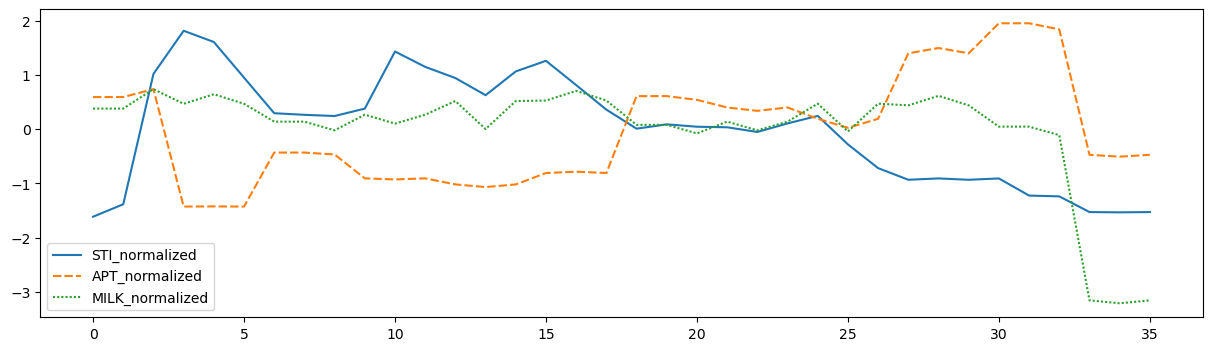

In [30]:
plt.figure(figsize=(15,4))

sn.lineplot(data=data_monthly[['STI_normalized', 'APT_normalized', 'MILK_normalized']])

In [31]:
fig_6 = px.line(data_monthly, x='month', y=['STI_normalized', 'APT_normalized'], template=template)

fig_6.update_layout(
    title='Evolution de nombre de vols passagers et de l\'intensité de confinement',
    xaxis_title="Date"
)

series_names = ["Stringency Index normalisé", "Nombre de vols passagers normalisé"]

for idx, name in enumerate(series_names):
    fig_6.data[idx].name = name
    fig_6.data[idx].hovertemplate = name

fig_6.show()

In [32]:
fig_7 = px.scatter(data_quarterly, x='TC', y=['STI_normalized', 'GDP_normalized'], template=template)

fig_7.update_layout(
    title='Intensité de confinement et PIB en fonction du nombre total des cas',
    xaxis_title="Nombre total des cas"
)

series_names = ["Stringency Index normalisé", "PIB normalisé"]

for idx, name in enumerate(series_names):
    fig_7.data[idx].name = name
    fig_7.data[idx].hovertemplate = name

fig_7.show()

In [33]:
fig_8 = px.scatter(data_quarterly, x='TD', y=['STI_normalized', 'GDP_normalized'], title='', template=template)
fig_8.show()

In [34]:
fig_9 = px.scatter(data_quarterly, x='TC', y=['MILK'], title='', template=template)
fig_9.show()

In [35]:
#fig_10 = px.scatter(data_quarterly, x='Quarter', y=['AFT'], title='', template=template)
#fig_10.show()

In [36]:
#fig_10 = px.scatter(data_quarterly, x='Quarter', y=['EXPENDITURE'], title='', template=template)
#fig_10.show()

In [37]:
print("data_quarterly columns : ", data_quarterly.columns)
print("################################")
print("data_monthly columns : ", data_monthly.columns)

data_quarterly columns :  Index(['Quarter', 'TC', 'TD', 'POP', 'HDI', 'STI', 'PBI_var', 'GDP', 'POVERTY',
       'APT', 'MILK', 'log_GDP', 'GDP_normalized', 'STI_normalized',
       'APT_normalized'],
      dtype='object')
################################
data_monthly columns :  Index(['month', 'STI', 'APT', 'MILK', 'APT_normalized', 'STI_normalized',
       'MILK_normalized'],
      dtype='object')


# Partie WEB :

In [38]:
header = {
    "background-color": "#222222",
    "height": "100px",
    "display": "flex",
    "flex-direction": "column",
    "justify-content": "center;",
}

header_title = {
    'color': '#FFFFFF',
    'font-size': '48px',
    'font-weight': 'bold',
    'text-align': 'center',
    'margin': '0 auto',
}

header_description = {
    'color': '#CFCFCF',
    'margin': '0px auto',
    'text-align': 'center',
    'max-width': '100%',
}

plot_1 = {
    'max-width': '50%',
    'height' : '10px',
    'padding-right': '0px',
    'padding-left': '-20px'
    #'margin-bottom': '24px',
    #'box-shadow': '0 4px 6px 0 rgba(0, 0, 0, 0.18)'
}

plot_card = {
    'max-width': '50%',
    'height': '10px',
    'padding-right': '-20px',
    'padding-left': '0px',
    #'margin-bottom': '24px',
    #'box-shadow': '0 4px 6px 0 rgba(0, 0, 0, 0.18)'
}

plots = {
    'position' : 'relative',
    'max-width': '100%',
    'max-height': '20px',
    'margin-bottom': '24px',
    'box-shadow': '0 4px 6px 0 rgba(0, 0, 0, 0.18)',
    'display' : 'flex',
    'justify-content' : 'space-between'
}

wrapper = {
    'margin-right': '0px',
    'margin-left': '0px',
    'max-width': '100%',
    'padding-right': '0px',
    'padding-left': '0px',
    'margin-top': '0px',
    'font-family': '"Lato", sans-serif',
    'background-color': 'white'
}

In [39]:
app = JupyterDash(__name__)
app.layout = html.Div(
    children=[
        html.Div(children=[
            html.H1(children="Projet Blanc", style=header_title),
                html.P(
                    children="",
                    style=header_description
                )     
        ],
        style=header),
        html.Div(children=[
            html.Div(
                children=[
                    dcc.Graph(figure=fig_2),
                    dcc.Graph(figure=fig_5)
                ],
                style=plot_1),
            html.Div(
                children=[
                    dcc.Graph(figure=fig_6),
                    dcc.Graph(figure=fig_7)         
                ],
                style=plot_card,
            )
        ],
        style=plots)
        
    ],
    style=wrapper
)

if __name__ =='__main__':
    app.run_server(mode="external")

Dash is running on http://127.0.0.1:8050/

Dash app running on http://127.0.0.1:8050/


In [430]:
%store fig_1

Stored 'fig_1' (Figure)
